In [181]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model


In [182]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [183]:
latent_dim = 28

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

In [184]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [185]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0293 - val_loss: 0.0177
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0159 - val_loss: 0.0153
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0146 - val_loss: 0.0144
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0142 - val_loss: 0.0142
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0140 - val_loss: 0.0141
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0139 - val_loss: 0.0139
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0138 - val_loss: 0.0139
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0138 - val_loss: 0.0139
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0137 - val_loss: 0.0138
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.013

In [186]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

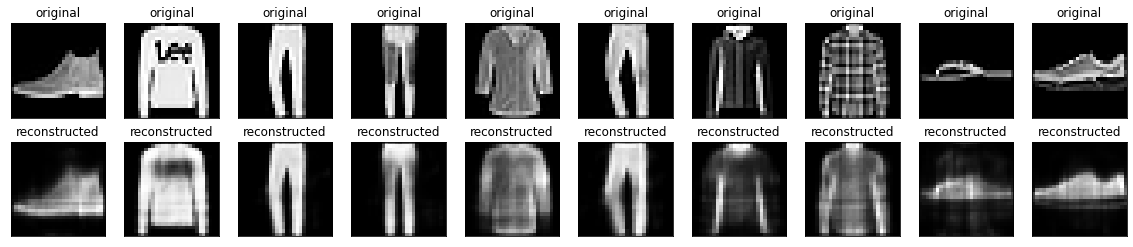

In [187]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

22.487467
[ 1.6539013  6.2138214  0.         6.008849   5.1159964  2.0549586
  4.9824486  3.9929447  3.1468575  1.3980792  3.1641645  3.5985405
  6.08093    4.277922   3.816771   2.4398854  4.694525   7.576429
  1.046911   1.1699543  1.2209109  4.995367   5.3931456  2.7612388
 11.067993   3.20568    2.8250513  4.7050223]
[ 4.6320715  10.48727989  0.          6.51960135 19.73152161 -4.62075424
  6.96465206  0.10191536  6.43229008  2.88074517 11.61293316  8.3922081
  9.2319231   3.97841763  0.3882885   6.21742964  1.98408592 10.13223934
 13.61824703 -4.81149149  2.90540767 11.66689777  8.59516716  6.0923214
 11.4684782   8.48385429  2.6361022  -4.32737589]


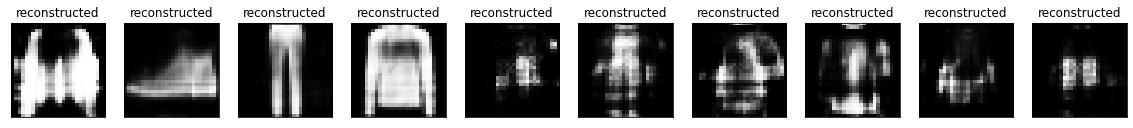

In [189]:
print(np.max(encoded_imgs))
print(encoded_imgs[0])

arr = np.random.rand(10,28)*10
arr[0] = encoded_imgs[0] - encoded_imgs[3] +encoded_imgs[1]
arr[1] = encoded_imgs[0]
arr[2] = encoded_imgs[3]
arr[3] = encoded_imgs[1]
print(arr[0])

my_stupidity = autoencoder.decoder(arr).numpy()


n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(my_stupidity[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()